<a href="https://colab.research.google.com/github/IshaanSamant/Tensorflow-Programs/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x  
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [0]:
#  LOAD AND SPLIT DATASET
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170500096/170498071 [==============================] - 2s 0us/step


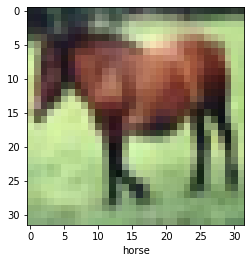

In [0]:
# Let's look at a one image
IMG_INDEX = 7  # change this to look at other images

plt.imshow(train_images[IMG_INDEX] ,cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [0]:
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [0]:
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.5306 - accuracy: 0.4385 - val_loss: 1.2505 - val_accuracy: 0.5489
Epoch 2/10
1563/1563 [==============================] - 65s 42ms/step - loss: 1.1762 - accuracy: 0.5807 - val_loss: 1.1054 - val_accuracy: 0.6074
Epoch 3/10
1563/1563 [==============================] - 65s 42ms/step - loss: 1.0281 - accuracy: 0.6390 - val_loss: 0.9810 - val_accuracy: 0.6557
Epoch 4/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.9253 - accuracy: 0.6753 - val_loss: 0.9455 - val_accuracy: 0.6642
Epoch 5/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8530 - accuracy: 0.7012 - val_loss: 0.8996 - val_accuracy: 0.6868
Epoch 6/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7932 - accuracy: 0.7201 - val_loss: 0.8571 - val_accuracy: 0.7017
Epoch 7/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7441 - accuracy: 0.7391 - val_loss: 0.8662 -

In [0]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

313/313 - 3s - loss: 0.8638 - accuracy: 0.7141
0.7141000032424927
